# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pymacueticals_df = pd.merge(study_results, mouse_metadata, how="left", on = "Mouse ID")

# Display the data table for preview
pymacueticals_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [60]:
# Checking the number of mice.
mouse_data = pymacueticals_df['Mouse ID'].unique()
num_mice = len(mouse_data)
num_mice

249

In [61]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dupes = pymacueticals_df[pymacueticals_df[["Mouse ID", "Timepoint"]].duplicated() == True]
mouse_dupes_id = mouse_dupes["Mouse ID"].unique()
mouse_dupes_id

array(['g989'], dtype=object)

In [62]:
# Optional: Get all the data for the duplicate mouse ID. 
#Skipping. 

In [63]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_pymaceuticals_df = pymacueticals_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_pymaceuticals_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [64]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_data = clean_pymaceuticals_df['Mouse ID'].unique()
clean_num_mice = len(clean_mouse_data)
clean_num_mice

249

## Summary Statistics

In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_data = clean_pymaceuticals_df.set_index(["Drug Regimen"])
regmimen_group_data = regimen_data.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_mean = regmimen_group_data['Tumor Volume (mm3)'].mean()
regimen_median = regmimen_group_data['Tumor Volume (mm3)'].median()
regimen_var = regmimen_group_data['Tumor Volume (mm3)'].var()
regimen_stdev = regmimen_group_data['Tumor Volume (mm3)'].std()
regimen_sem = regmimen_group_data['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
regimen_df = pd.DataFrame({'Mean Tumor Volume': regimen_mean,
                           'Median Tumor Volume': regimen_median,
                           'Tumor Volume Variance': regimen_var,
                           'Tumor Volume Standar Deviation': regimen_stdev,
                           'Tumor Volume Standard Error': regimen_sem})
regimen_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standar Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [66]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_regimen_summary_df = regimen_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_regimen_summary_df



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Mice Tested'>

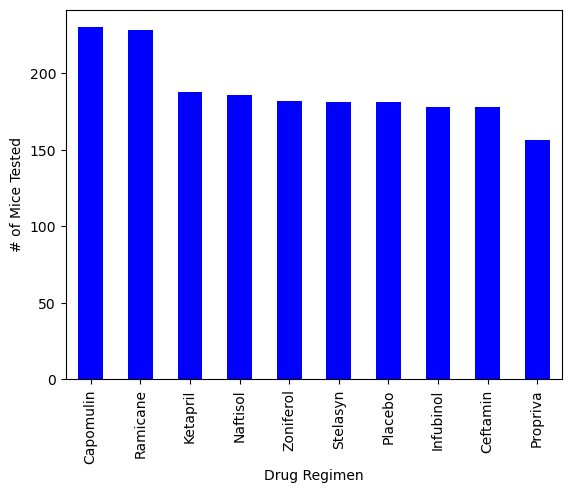

In [67]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_regimen = clean_pymaceuticals_df[['Drug Regimen', 'Timepoint']]
num_mice_per_drug = mouse_regimen['Drug Regimen'].value_counts()

#Plot the chart
num_mice_per_drug.plot(kind='bar', color = 'blue',
                       xlabel= 'Drug Regimen',
                       ylabel= '# of Mice Tested')

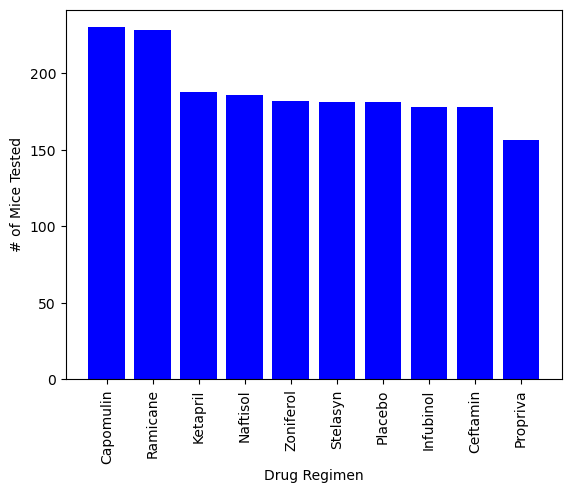

In [68]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen = num_mice_per_drug.index.values
num_mice_on_regimen = num_mice_per_drug.values

plt.bar(drug_regimen, num_mice_on_regimen, color='blue', align='center')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Mice Tested')
plt.xticks(rotation=90)
plt.show()

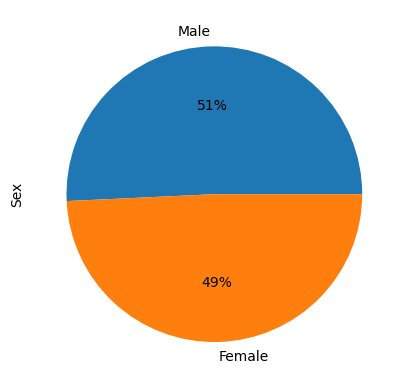

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_fmale = clean_pymaceuticals_df['Sex'].value_counts()
sex = ['Male', 'Female']
male_fmale.plot(kind='pie', autopct='%1.0f%%', ylabel= 'Sex')
plt.show()

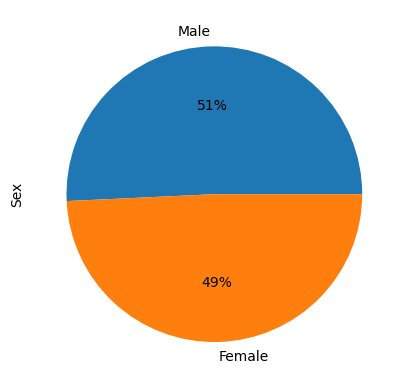

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
m_f = male_fmale.index.values
num_each_sex = male_fmale.values
plt.ylabel('Sex')
plt.pie(num_each_sex, labels = m_f, autopct= '%1.0f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [71]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = clean_pymaceuticals_df.loc[clean_pymaceuticals_df["Drug Regimen"] == "Capomulin", :]
ramicane_df = clean_pymaceuticals_df.loc[clean_pymaceuticals_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = clean_pymaceuticals_df.loc[clean_pymaceuticals_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df = clean_pymaceuticals_df.loc[clean_pymaceuticals_df["Drug Regimen"] == "Ceftamin", :]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Capomulin
capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_vol = pd.DataFrame(capomulin_last)
capomulin_merge = pd.merge(capomulin_vol, clean_pymaceuticals_df, on=("Mouse ID","Timepoint"), how="left")
capomulin_merge.head()

# Ramicane
ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_vol = pd.DataFrame(ramicane_last)
ramicane_merge = pd.merge(ramicane_vol, clean_pymaceuticals_df, on=("Mouse ID","Timepoint"), how="left")
ramicane_merge.head()

# Infubinol
infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_vol = pd.DataFrame(infubinol_last)
infubinol_merge = pd.merge(infubinol_vol, clean_pymaceuticals_df, on=("Mouse ID","Timepoint"), how="left")
infubinol_merge.head()

# Ceftamin
ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_vol = pd.DataFrame(ceftamin_last)
ceftamin_merge = pd.merge(ceftamin_vol, clean_pymaceuticals_df, on=("Mouse ID","Timepoint"), how="left")
ceftamin_merge.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25


In [72]:
# Put treatments into a list for a for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Define a function to calculate IQR and potential outliers
def calculate_outliers(treatment_name, tumors):
    quartiles = tumors.quantile([0.25, 0.5, 0.75])
    lowerq, upperq, iqr = quartiles[0.25], quartiles[0.75], quartiles[0.75] - quartiles[0.25]
    lower_bound, upper_bound = lowerq - (1.5 * iqr), upperq + (1.5 * iqr)
    
    print(f"Values below {lower_bound} could be outliers for {treatment_name}.")
    print(f"Values above {upper_bound} could be outliers for {treatment_name}.\n")

# Iterate through treatments and calculate outliers
for treatment in treatments:
    tumors = eval(f"{treatment.lower()}_merge['Tumor Volume (mm3)']")
    calculate_outliers(treatment, tumors)
    tumor_vol_list.append(tumors)

# Display the tumor volume data for later use in a box plot
print("\nTumor Volume Data for Box Plot:")
print(tumor_vol_list)


Values below 20.70456164999999 could be outliers for Capomulin.
Values above 51.83201549 could be outliers for Capomulin.

Values below 17.912664470000003 could be outliers for Ramicane.
Values above 54.30681135 could be outliers for Ramicane.

Values below 36.83290494999999 could be outliers for Infubinol.
Values above 82.74144559000001 could be outliers for Infubinol.

Values below 25.355449580000002 could be outliers for Ceftamin.
Values above 87.66645829999999 could be outliers for Ceftamin.


Tumor Volume Data for Box Plot:
[0     38.982878
1     38.939633
2     30.485985
3     37.074024
4     40.159220
5     47.685963
6     37.311846
7     38.125164
8     38.753265
9     41.483008
10    38.846876
11    28.430964
12    33.329098
13    46.539206
14    32.377357
15    41.581521
16    23.343598
17    40.728578
18    34.455298
19    31.023923
20    40.658124
21    39.952347
22    36.041047
23    28.484033
24    31.896238
Name: Tumor Volume (mm3), dtype: float64, 0     38.407618
1     

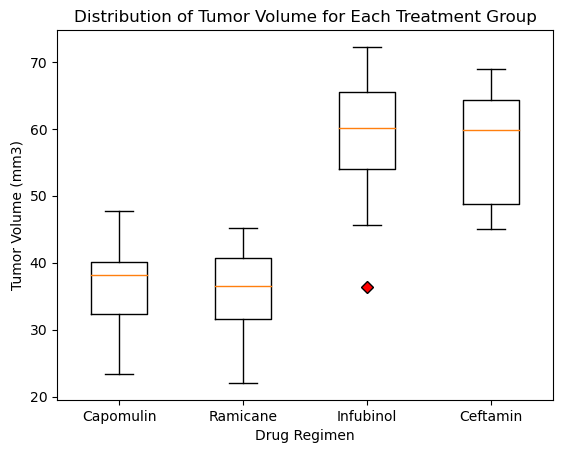

In [73]:
# Generate a box plot for each treatment group
plt.boxplot(tumor_vol_list, labels=treatments, flierprops=dict(markerfacecolor='red', marker='D'))

# Set chart title and labels
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()


## Line and Scatter Plots

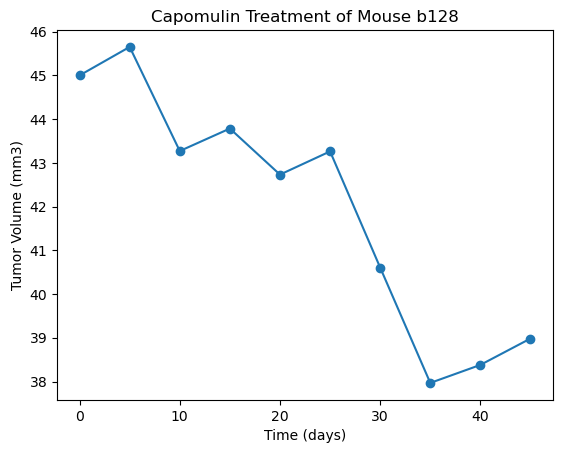

In [74]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = clean_pymaceuticals_df.loc[clean_pymaceuticals_df['Mouse ID'] == 'b128']

# Plot
plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"], marker='o')
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse b128")

plt.show()


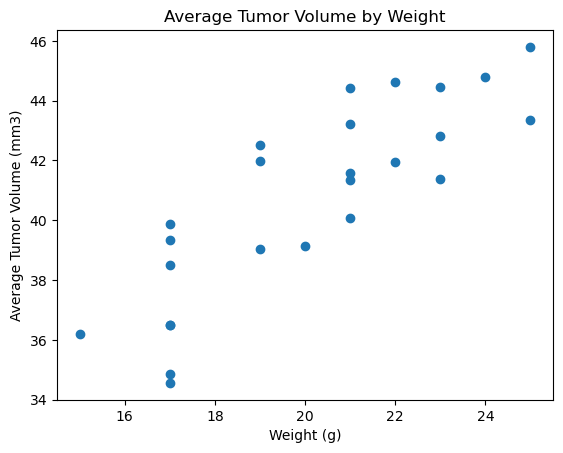

In [75]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Find average tumor volume for each mouse

average_volume_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
merged_avg_vol_df = pd.merge(capomulin_df, average_volume_df, on='Mouse ID')
final_avg_vol_df = merged_avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

weight_values = final_avg_vol_df['Weight (g)']
average_tumor_values = final_avg_vol_df['avg_tumor_vol']

# Create a scatter plot based on the new dataframe above with circle markers and listed colors
plt.scatter(weight_values, average_tumor_values)

# Add labels and title to the plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')

# Display the plot
plt.show()


## Correlation and Regression

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


Text(20, 37, 'y = 0.95x + 21.55')

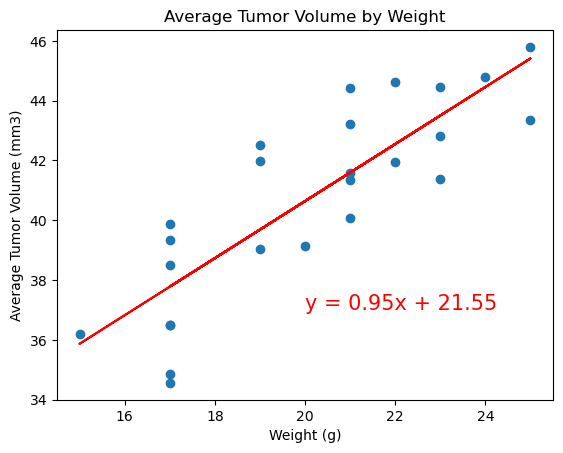

In [78]:
# Calculate the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen
x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']
correlation = st.pearsonr(x,y)

print(f"""The correlation between the weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")